In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Exploring & Machine Learning for Airbnb Listings in Austin,Texas
Airbnb does not provide open data in the sense of giant databases or dumps that we can work with. However, Inside Airbnb utilizes public information compiled from the Airbnb web-site and analyzes publicly available information about a city's Airbnb's listings, and provides filters and key metrics so we can see how Airbnb is being used in the major cities around the world. Inside Airbnb is an independent, non-commercial set of tools and data that is not associated with or endorsed by Airbnb or any of Airbnb's competitors.

However, the information provided by Inside Airbnb isn't going to be enough for us. We are going to download data from there for our own analysis.

I will be working with the Airbnb data of Austin,Texas. You are welcome to choose any city you prefer.

We are going to look at Airbnb listings and calendars, and try to provide some exploratory analysis around predicting listing prices, both for, if we were hypothetically working at Airbnb, and also for a consumer. See the data visually [here](http://insideairbnb.com/austin/?neighbourhood=&filterEntireHomes=false&filterHighlyAvailable=false&filterRecentReviews=false&filterMultiListings=false)

In [0]:
%cd /content/drive/My Drive/airbnb

/content/drive/My Drive/airbnb


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

reviews = pd.read_csv('/content/drive/My Drive/airbnb/reviews.csv.gz')
calendar = pd.read_csv('/content/drive/My Drive/airbnb/calendar.csv.gz')
listings = pd.read_csv('/content/drive/My Drive/airbnb/listings.csv.gz')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/airbnb/reviews.csv.gz'

## Calender
How busy is it for Airbnb hosts in Austin,Texas?

In [0]:
calendar = pd.read_csv('calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 365 days and 11882 unique listings in the calendar data.


In [0]:
calendar.date.min(),calendar.date.max()

('2019-07-12', '2020-07-10')

Calendar data covers one year time frame, that is, price and availability every day for the next one year.

In [0]:
calendar.shape

(4336930, 7)

In [0]:

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,140561,2019-07-12,t,$279.00,$279.00,2,1000
1,140504,2019-07-12,f,$101.00,$101.00,5,365
2,140504,2019-07-13,f,$101.00,$101.00,5,365
3,140504,2019-07-14,f,$101.00,$101.00,5,365
4,140504,2019-07-15,f,$101.00,$101.00,5,365


In [0]:
calendar.available.value_counts()

f    2755070
t    1581860
Name: available, dtype: int64

f (false) means not available, t(true) means available.

Find out daily average availability for one year. Convert available column to 0 if available and 1 if not.

In [0]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


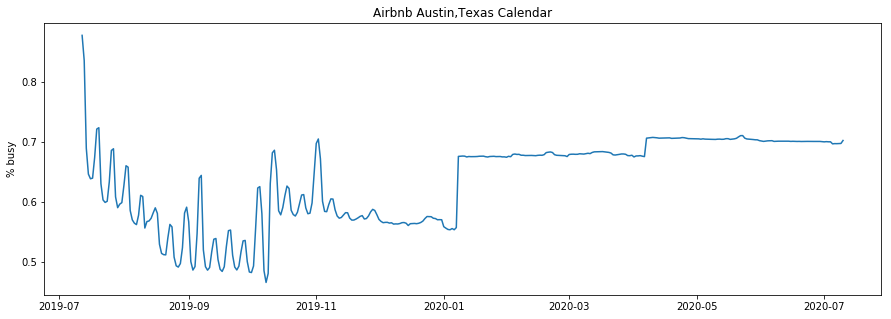

In [0]:

plt.figure(figsize=(15, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Austin,Texas Calendar')
plt.ylabel('% busy')
plt.show();

The busiest month in Austin, Texas was August which has just passed.The next busy months seems November and extend to the summer. These are all within our experience and expectations.

In [0]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,140561,2019-07-12,t,$279.00,$279.00,2,1000
1,140504,2019-07-12,f,$101.00,$101.00,5,365
2,140504,2019-07-13,f,$101.00,$101.00,5,365
3,140504,2019-07-14,f,$101.00,$101.00,5,365
4,140504,2019-07-15,f,$101.00,$101.00,5,365


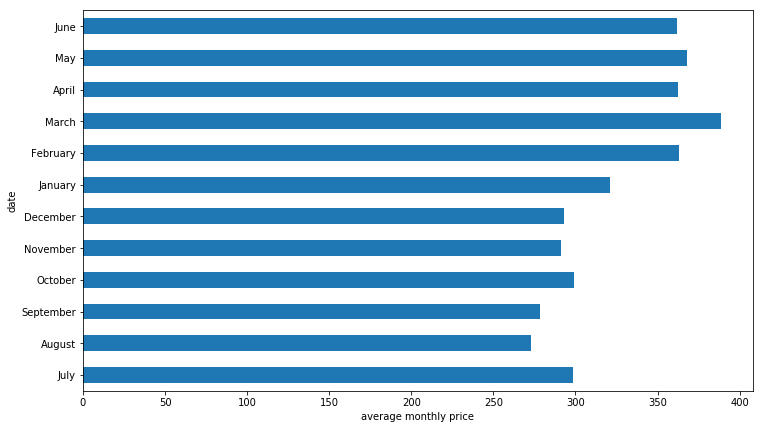

In [0]:

calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

The Airbnb price in Austin Texas  increases in the months of March, May followed by June, April and February. 

Compile the listings

In [0]:
listings = pd.read_csv('listings.csv.gz')
print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 11882 listings in the listing data.


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Neighbourhood Listings

Number of Listings in the Neighbourhood.

In [0]:
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
78704,2368
78702,1560
78741,770
78703,665
78701,664
78745,583
78705,582
78751,492
78723,386


The neighbourhood that has the highest number of listings is the 78704 community. From map at [Inside Airbnb](http://insideairbnb.com/austin/), we can see that too. Check out the details of the various neighbourhoods using the Inside Airbnb map.

### Review Score Rating

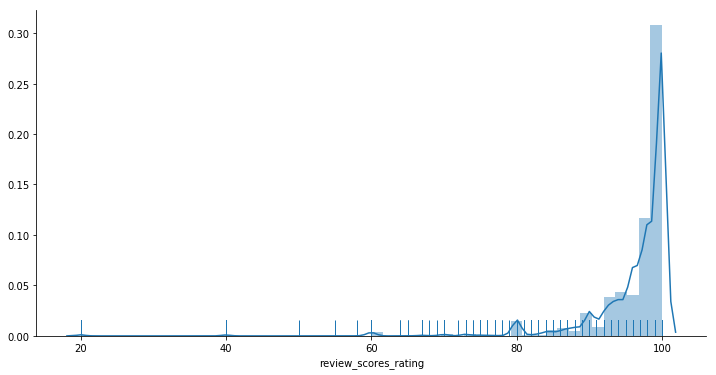

In [0]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [0]:
listings.review_scores_rating.describe()

count    9233.000000
mean       96.218347
std         6.826392
min        20.000000
25%        95.000000
50%        98.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

As expected, most of the customers, leave Higher ratings

### Exploring the Price

In [0]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)

listings['price'].describe()

count    11882.000000
mean       357.686921
std        967.802265
min          0.000000
25%         80.000000
50%        145.000000
75%        300.000000
max      10900.000000
Name: price, dtype: float64

The most expensive Room/accomodation in Austin, Texas costs $10,900. A Luxury house most probably..!!. 

This 
[Luxury lakefront House](https://www.airbnb.ca/rooms/727593?source_impression_id=p3_1570180267_nnaMOEmaeOYrAKuu&s=mqimp5XR) was the closest I could find. It is $9330/night.

In [0]:
listings.iloc[np.argmax(listings['price'])]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


id                                                                                       22765762
listing_url                                                 https://www.airbnb.com/rooms/22765762
scrape_id                                                                          20190712060834
last_scraped                                                                           2019-07-12
name                                                4BR/3BA The Ethel #2 - Perfect SXSW Location!
summary                                         Beautiful four bedroom/ three full bath home i...
space                                                                                         NaN
description                                     Beautiful four bedroom/ three full bath home i...
experiences_offered                                                                          none
neighborhood_overview                                                                         NaN
notes               

In [0]:
listings.loc[listings['price'] > 2000]['price'].describe()

count      224.000000
mean      6170.098214
std       3297.388975
min       2050.000000
25%       2962.750000
50%       4588.500000
75%      10000.000000
max      10900.000000
Name: price, dtype: float64

I decided to remove listings that exceed $2000/night, as well as 7 listings at price 0, for the following exploratory analysis.

In [0]:
listings.loc[listings['price'] == 0]['price'].count()

7

### Listings price distribution after removing outliers

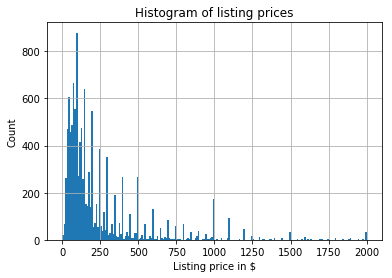

In [0]:
listings.loc[(listings.price <= 2000) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

The maximum listings are in the 0-250 dollar range. Hence, the listing prices.

### Neighbourhood vs. Price

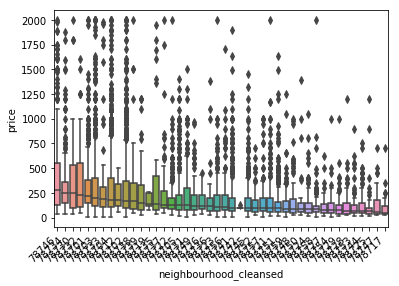

In [0]:
sort_price = listings.loc[(listings.price <= 2000) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 2000) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

Not only 78746  has the highest number of listings, it also enjoys the highest median price, and 70717 has the lowest median price.

### host vs. price

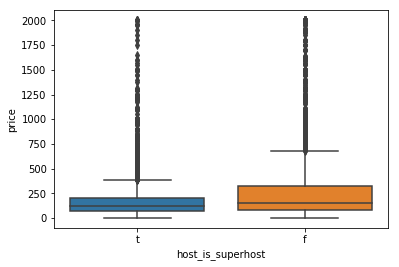

In [0]:
sns.boxplot(y='price', x='host_is_superhost', data=listings.loc[(listings.price <= 2000) & (listings.price > 0)])
plt.show();

Super host  enjoys a little higher median price than normal host.

### property type vs. price

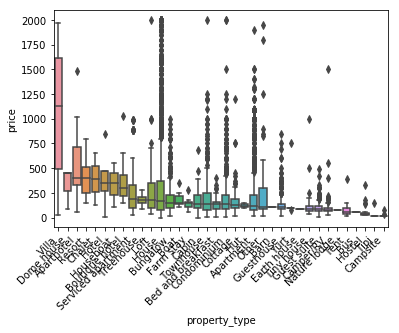

In [0]:
sort_price = listings.loc[(listings.price <= 2000) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 2000) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

When we look at the median price for each property type, we have to be careful that we can't say "GuestHouse" has a higher median price than "Tiny house" and "hostel". This is because GuestHouse, Tiny House and hostel have only one listings each. Zoom in to see it.

In [0]:
listings.property_type.value_counts()

House                 5631
Apartment             2945
Condominium            902
Guesthouse             502
Townhouse              425
Bungalow               358
Guest suite            253
Serviced apartment     173
Loft                   145
Camper/RV               90
Cottage                 62
Tiny house              59
Villa                   53
Bed and breakfast       50
Other                   49
Resort                  35
Cabin                   26
Hostel                  24
Boutique hotel          14
Tent                    13
Aparthotel              12
Farm stay               11
Campsite                 9
Boat                     7
Yurt                     6
Tipi                     5
Treehouse                4
Hotel                    4
Houseboat                3
Dome house               3
Barn                     2
Hut                      2
Chalet                   2
Earth house              1
Bus                      1
Nature lodge             1
Name: property_type, dtype: 

### room type vs. price

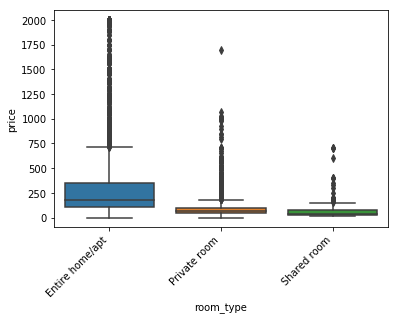

In [0]:
sort_price = listings.loc[(listings.price <= 2000) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 2000) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

This goes without saying that Entire home/apt has a much higher median price than the other rooms

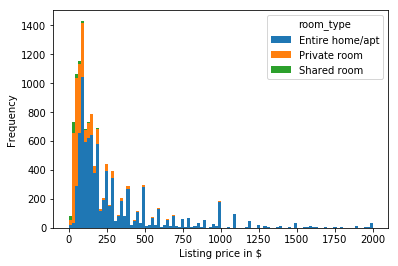

In [0]:
listings.loc[(listings.price <= 2000) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');

Entire home/apt also has the most number of listings. Inside Airbnb has indicated that Entire homes or apartments highly available year-round for tourists.

### bed type vs. price

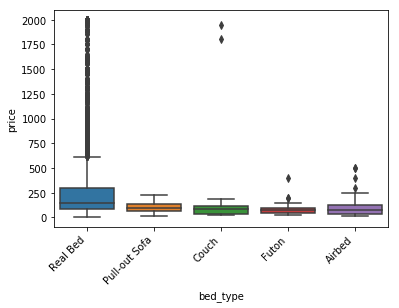

In [0]:

sort_price = listings.loc[(listings.price <= 2000) & (listings.price > 0)]\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.loc[(listings.price <= 2000) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

There is no surprise.

### Amenities
The amenities text field needs some cleaning.

In [0]:

listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [0]:
listings['amenities'].head()

0    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2    TV,Wifi,Air conditioning,Kitchen,Pets live on ...
3    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
4    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
Name: amenities, dtype: object

### Top 20 most common amenities¶

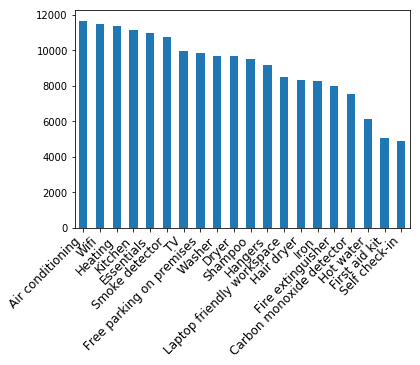

In [0]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

Air Conditioning, Wifi, heating, essential, kitchen essentials and smoke detector etc are among the most common amenities.

### Amenities vs. price top 20

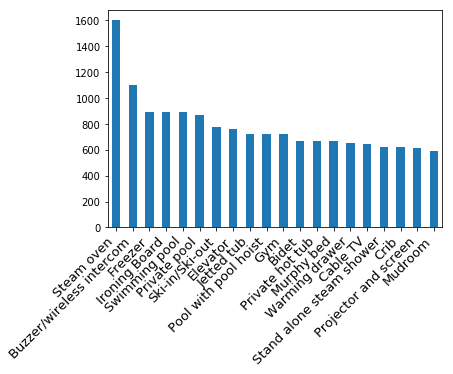

In [0]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=13)
plt.show();

Interesting, amenities feature does seem to have some relationship with price.

### Number of beds vs. price

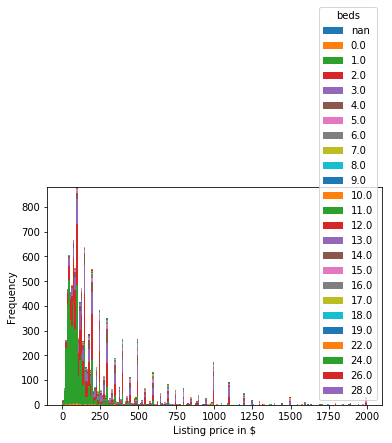

In [0]:
listings.loc[(listings.price <= 2000) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=200)
plt.xlabel('Listing price in $');

Vast majority of the listings have one bed, the one-bed listing prices have a very wide range. 

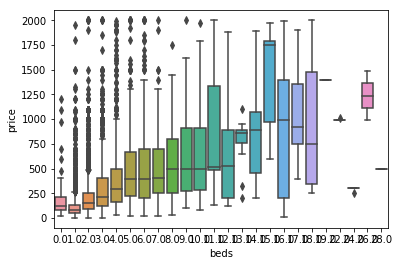

In [0]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 2000) & (listings.price > 0)])
plt.show();

Interesting to discover that the median price for no bed listings is higher than 1-bed listings.

### Numeric features
We select several numeric features and try to explore them all together.

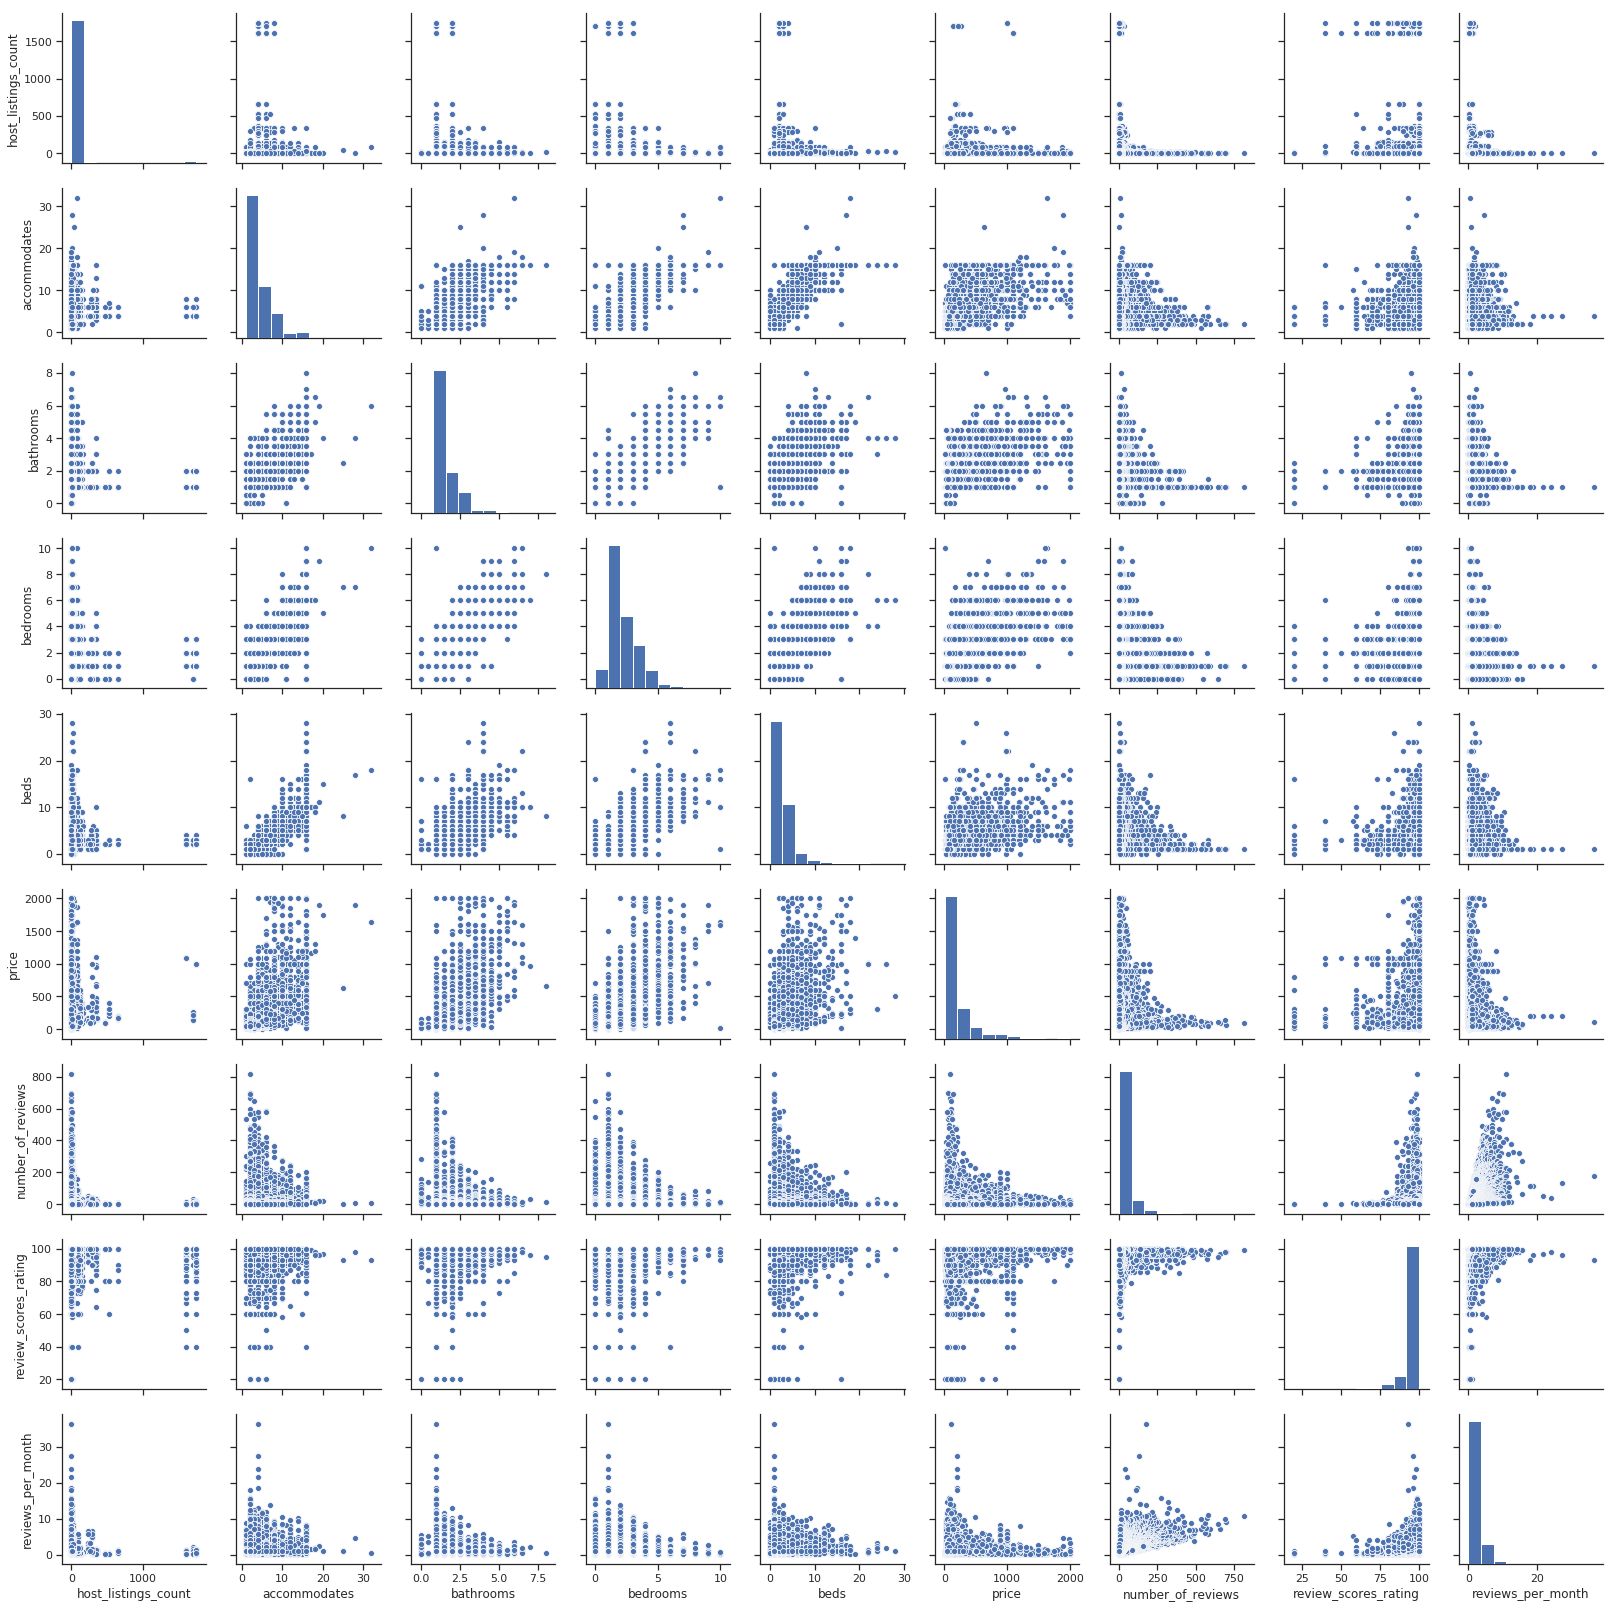

In [0]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
sns.pairplot(listings.loc[(listings.price <= 2000) & (listings.price > 0)][col].dropna())
plt.show();

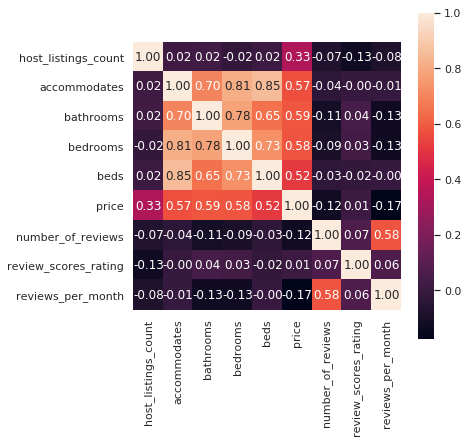

In [0]:
corr = listings.loc[(listings.price <= 2000) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

There are some not bad news such as number of bedrooms and accommodates seem to be correlated with price.

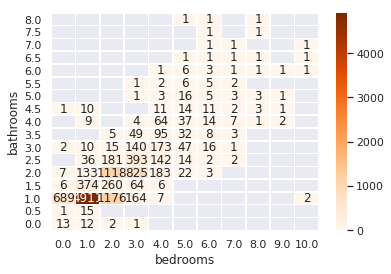

In [0]:
sns.heatmap(listings.loc[(listings.price <= 2000) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

Vast majority of listings have one bedroom and 1 bathroom.

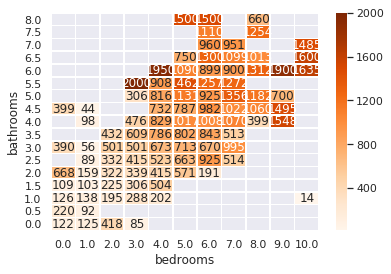

In [0]:

sns.heatmap(listings.loc[(listings.price <= 2000) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

It looks like listings with 6 bedrooms and 4 bathrooms have the highest median price followed by 9 bedrooms and 6 bathrooms. But we must be skeptical about this finding because from the above single graph, we don't know how many listings in this category.

##Modeling Lising Prices
### Data preprocessing and feature engineering

In [0]:
listings = pd.read_csv('/content/drive/My Drive/airbnb/listings.csv.gz')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processing price feature. The feature we are going to model and predict.

In [0]:

listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 2000) & (listings.price > 0)]


Term document matrix for amenities feature.

In [0]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [0]:
listings.amenities.head()

0    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2    TV,Wifi,Air conditioning,Kitchen,Pets live on ...
3    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
4    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
Name: amenities, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

Replace the values in the following feature to 0 if "f", to 1 if "t".

In [0]:

columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

Same way to clean up the other money value columns.

In [0]:

listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)


The following are the numeric features we will be using.

In [0]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]


Fill the missing values in the numeric features with median.

In [0]:

for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)


host_is_superhost
host_identity_verified
host_has_profile_pic
host_listings_count
host_total_listings_count
bathrooms
bedrooms
review_scores_rating


In [0]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Processing Categorical features

In [0]:
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)


Adding amenities feature

In [0]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

Data preprocessing and feature engineering done!

### Random Forest Regressor

###Random Forest Regression in Python

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Approach :

Pick at random K data points from the training set.
Build the decision tree associated with those K data points.
Choose the number Ntree of trees you want to build and repeat step 1 & 2.
For a new data point, make each one of your Ntree trees predict the value of Y for the data point, and assign the new data point the average across all of the predicted Y values.

*credits= GeeksforGeeks*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 177.778
R^2 test: 0.605


### Feature importance of Random Forest

In [0]:

coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
13,bathrooms,0.222361
14,bedrooms,0.128552
16,number_of_reviews,0.063304
9,cleaning_fee,0.057484
10,host_listings_count,0.056821
11,host_total_listings_count,0.055554
8,security_deposit,0.043094
12,minimum_nights,0.024365
15,guests_included,0.020882
153,Entire home/apt,0.013222


### Assessing the Fit of Regression Models


A well-fitting regression model results in predicted values close to the observed data values. The mean model, which uses the mean for every predicted value, generally would be used if there were no informative predictor variables. The fit of a proposed regression model should therefore be better than the fit of the mean model.

Three statistics are used in Ordinary Least Squares (OLS) regression to evaluate model fit: R-squared, the overall F-test, and the Root Mean Square Error (RMSE). All three are based on two sums of squares: Sum of Squares Total (SST) and Sum of Squares Error (SSE). SST measures how far the data are from the mean, and SSE measures how far the data are from the model’s predicted values. Different combinations of these two values provide different information about how the regression model compares to the mean model.

### R-squared and Adjusted R-squared

- The difference between SST and SSE is the improvement in prediction from the regression model, compared to the mean model. Dividing that difference by SST gives R-squared. 
- It is the proportional improvement in prediction from the regression model, compared to the mean model. It indicates the goodness of fit of the model.

- R-squared has the useful property that its scale is intuitive: it ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. 
- Improvement in the regression model results in proportional increases in R-squared.

- One pitfall of R-squared is that it can only increase as predictors are added to the regression model. This increase is artificial when predictors are not actually improving the model’s fit. 
- To remedy this, a related statistic, Adjusted R-squared, incorporates the model’s degrees of freedom. Adjusted R-squared will decrease as predictors are added if the increase in model fit does not make up for the loss of degrees of freedom. Likewise, it will increase as predictors are added if the increase in model fit is worthwhile. 

![alt text](https://i.stack.imgur.com/BTGK6.png)

- Adjusted R-squared should always be used with models with more than one predictor variable. It is interpreted as the proportion of total variance that is explained by the model.

![alt text](https://www.graphpad.com/guides/prism/7/curve-fitting/reg_adjustedr2equation.png)
*img source:- Graphpad*


There are situations in which a high R-squared is not necessary or relevant. When the interest is in the relationship between variables, not in prediction, the R-square is less important. An example is a study on how religiosity affects health outcomes. A good result is a reliable relationship between religiosity and health. No one would expect that religion explains a high percentage of the variation in health, as health is affected by many other factors. Even if the model accounts for other variables known to affect health, such as income and age, an R-squared in the range of 0.10 to 0.15 is reasonable.

![alt text](https://blog.minitab.com/hubfs/Imported_Blog_Media/flplinear-1.gif)

*Img source:- Medium*
 

### The F-test

The F-test evaluates the null hypothesis that all regression coefficients are equal to zero versus the alternative that at least one is not. An equivalent null hypothesis is that R-squared equals zero. A significant F-test indicates that the observed R-squared is reliable and is not a spurious result of oddities in the data set. Thus the F-test determines whether the proposed relationship between the response variable and the set of predictors is statistically reliable and can be useful when the research objective is either prediction or explanation.

![alt text](https://cdn.wallstreetmojo.com/wp-content/uploads/2019/04/F-Test-Formula.jpg)

*img source:- Wall street mojo*

### RMSE

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.


![alt text](https://www.includehelp.com/ml-ai/Images/rmse-1.jpg)

*img source:-include help*

The best measure of model fit depends on the researcher’s objectives, and more than one are often useful. The statistics discussed above are applicable to regression models that use OLS estimation. Many types of regression models, however, such as mixed models, generalized linear models, and event history models, use maximum likelihood estimation. These statistics are not available for such models.

*credits:- KAREN GRACE-MARTIN*

### LightGBM

### What is Light GBM?
Light GBM is a gradient boosting framework that uses tree based learning algorithm.
### How it differs from other tree based algorithm?
Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.
Below diagrams explain the implementation of LightGBM and other boosting algorithms.

![alt text](https://miro.medium.com/max/1514/1*AZsSoXb8lc5N6mnhqX5JCg.png)

![alt text](https://miro.medium.com/max/1229/1*whSa8rY4sgFQj1rEcWr8Ag.png)

### Why Light GBM is gaining extreme popularity?
The size of data is increasing day by day and it is becoming difficult for traditional data science algorithms to give faster results. Light GBM is prefixed as ‘Light’ because of its high speed. Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

*credits= pushkar mandot*

In [0]:
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [0]:
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [0]:
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)

Training until validation scores don't improve for 20 rounds.
[100]	valid's rmse: 202.045
[200]	valid's rmse: 180.537
[300]	valid's rmse: 173.519
[400]	valid's rmse: 170.508
[500]	valid's rmse: 169.29
[600]	valid's rmse: 168.7
[700]	valid's rmse: 168.263
[800]	valid's rmse: 168.069
Early stopping, best iteration is:
[780]	valid's rmse: 168.03


LGBMRegressor_GainFE(boosting_type='gbdt', class_weight=None,
                     colsample_bytree=0.9, importance_type='split',
                     learning_rate=0.01, max_depth=20, metric='rmse',
                     min_child_samples=20, min_child_weight=0.001,
                     min_split_gain=0.0, n_estimators=1000, n_jobs=4,
                     num_leaves=25, objective=None, random_state=0,
                     reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
                     subsample_for_bin=200000, subsample_freq=0)

In [0]:

y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

R^2 test: 0.647


### Feature importance of LightGBM

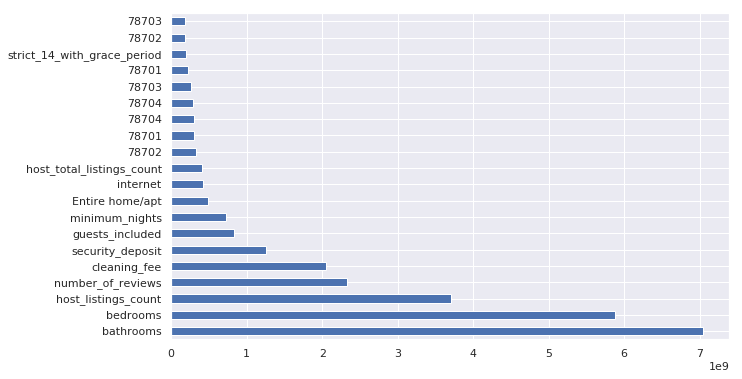

In [0]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))